In [4]:
from keras.datasets import cifar10
import numpy as np; 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from numpy import argmax
import matplotlib.pyplot as plt;   
import time

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 40s 0us/step


(50000, 32, 32, 3) (50000, 1)
[9]


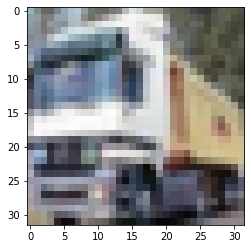

[4]


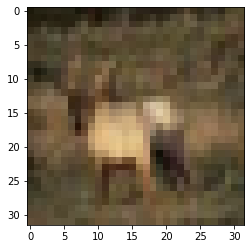

[1]


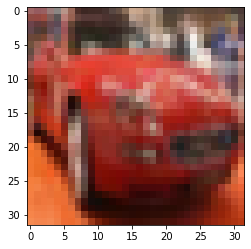

[7]


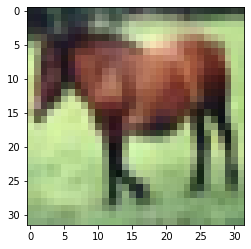

[3]


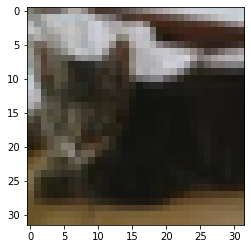

[7]


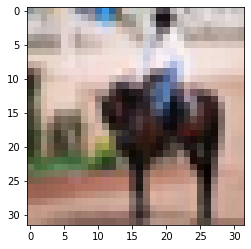

[2]


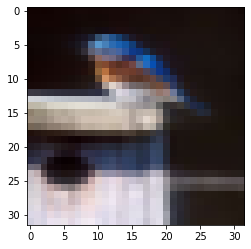

[9]


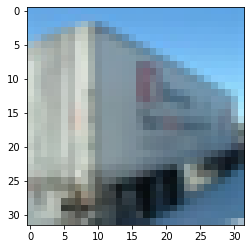

[3]


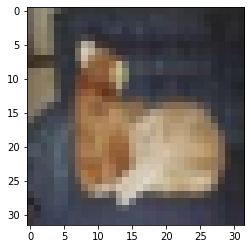

[6]


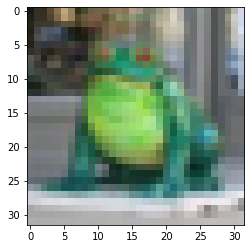

In [6]:
print(x_train.shape, y_train.shape)

"""
[0] airplane
[1] car
[2] bird
[3] cat
[4] deer
[5] dog
[6] frog
[7] horse
[8] ship
[9] truck
"""

for j in range(1,20,2):
            print(y_train[j])
            plt.imshow(x_train[j][:,:,:],cmap ='gray') 
            plt.show()
            time.sleep(0.1) 


In [7]:
num_classes=10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [8]:
x_train  /= 255
x_test /= 255

In [9]:
num_classes = 10
def baseline_model():
	# create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu')) # HIDDEN LAYER
    model.add(Dense(num_classes, activation='softmax'))
    	# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
def baseline_model2():
	# creating model
    model2 = Sequential()
    model2.add(Conv2D(32, (5, 5), input_shape=(32, 32, 3), activation='relu')) # First CNN Layer with 32 Kernels
    model2.add(MaxPooling2D(pool_size=(2, 2)))
    model2.add(Conv2D(64, (5, 5), input_shape=(32, 32, 3), activation='relu')) # Second CNN Layer with 64 Kernels
    model2.add(MaxPooling2D(pool_size=(2, 2)))
    model2.add(Flatten())
    model2.add(Dense(128, activation='relu')) # First HIDDEN LAYER
    model2.add(Dense(128, activation='relu')) # Second HIDDEN LAYER
    model2.add(Dense(10, activation='softmax')) # Output Layer 
    	#Compiling
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model2

In [11]:
model = baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 806,666
Trainable params: 806,666
Non-trainable params: 0
__________________________________________________

In [12]:
model2 = baseline_model2()
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [13]:
# 32 examples in a mini-batch, 
#smaller batch size means more updates in one epoch

# repeat 10 times 

# Fit the model
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
1563/1563 - 58s - loss: 1.4882 - accuracy: 0.4655 - 58s/epoch - 37ms/step
Epoch 2/10
1563/1563 - 53s - loss: 1.1800 - accuracy: 0.5839 - 53s/epoch - 34ms/step
Epoch 3/10
1563/1563 - 54s - loss: 1.0424 - accuracy: 0.6347 - 54s/epoch - 34ms/step
Epoch 4/10
1563/1563 - 55s - loss: 0.9569 - accuracy: 0.6646 - 55s/epoch - 35ms/step
Epoch 5/10
1563/1563 - 68s - loss: 0.8893 - accuracy: 0.6880 - 68s/epoch - 43ms/step
Epoch 6/10
1563/1563 - 64s - loss: 0.8272 - accuracy: 0.7099 - 64s/epoch - 41ms/step
Epoch 7/10
1563/1563 - 63s - loss: 0.7808 - accuracy: 0.7266 - 63s/epoch - 41ms/step
Epoch 8/10
1563/1563 - 63s - loss: 0.7281 - accuracy: 0.7437 - 63s/epoch - 40ms/step
Epoch 9/10
1563/1563 - 66s - loss: 0.6768 - accuracy: 0.7642 - 66s/epoch - 43ms/step
Epoch 10/10
1563/1563 - 67s - loss: 0.6259 - accuracy: 0.7797 - 67s/epoch - 43ms/step


In [14]:
model2.fit(x_train, y_train, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
1563/1563 - 123s - loss: 1.5018 - accuracy: 0.4539 - 123s/epoch - 79ms/step
Epoch 2/10
1563/1563 - 127s - loss: 1.1532 - accuracy: 0.5891 - 127s/epoch - 81ms/step
Epoch 3/10
1563/1563 - 128s - loss: 0.9968 - accuracy: 0.6481 - 128s/epoch - 82ms/step
Epoch 4/10
1563/1563 - 138s - loss: 0.8855 - accuracy: 0.6868 - 138s/epoch - 88ms/step
Epoch 5/10
1563/1563 - 139s - loss: 0.8086 - accuracy: 0.7146 - 139s/epoch - 89ms/step
Epoch 6/10
1563/1563 - 139s - loss: 0.7317 - accuracy: 0.7424 - 139s/epoch - 89ms/step
Epoch 7/10
1563/1563 - 140s - loss: 0.6697 - accuracy: 0.7639 - 140s/epoch - 89ms/step
Epoch 8/10
1563/1563 - 142s - loss: 0.6191 - accuracy: 0.7823 - 142s/epoch - 91ms/step
Epoch 9/10
1563/1563 - 133s - loss: 0.5563 - accuracy: 0.8040 - 133s/epoch - 85ms/step
Epoch 10/10
1563/1563 - 131s - loss: 0.5091 - accuracy: 0.8191 - 131s/epoch - 84ms/step


In [15]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy rate: %.2f" % (100*scores[1]))
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Accuracy rate: 64.61
CNN Error: 35.39%


In [16]:
scores2 = model2.evaluate(x_test, y_test, verbose=0)
print("Accuracy rate: %.2f" % (100*scores2[1]))
print("CNN Error: %.2f%%" % (100-scores2[1]*100))

Accuracy rate: 67.01
CNN Error: 32.99%


In [21]:
def new_model():
	# creating model
    new_model = Sequential()
    new_model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 3), activation='relu')) # First CNN Layer with 32 Kernels
    new_model.add(MaxPooling2D(pool_size=(2, 2)))
    new_model.add(Conv2D(64, (5, 5), activation='relu')) # Second CNN Layer with 64 Kernels
    new_model.add(MaxPooling2D(pool_size=(2, 2)))
    new_model.add(Flatten())
    new_model.add(Dense(64, activation='relu')) # First HIDDEN LAYER
    new_model.add(Dense(128, activation='relu')) # Second HIDDEN LAYER
    new_model.add(Dense(10, activation='sigmoid')) # Output Layer 
    	#Compiling
    new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return new_model

In [22]:
my_model = new_model()
my_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 64)               

In [23]:
my_model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
1563/1563 - 100s - loss: 1.5168 - accuracy: 0.4484 - 100s/epoch - 64ms/step
Epoch 2/10
1563/1563 - 125s - loss: 1.1792 - accuracy: 0.5809 - 125s/epoch - 80ms/step
Epoch 3/10
1563/1563 - 131s - loss: 1.0363 - accuracy: 0.6339 - 131s/epoch - 84ms/step
Epoch 4/10
1563/1563 - 120s - loss: 0.9490 - accuracy: 0.6643 - 120s/epoch - 77ms/step
Epoch 5/10
1563/1563 - 120s - loss: 0.8736 - accuracy: 0.6925 - 120s/epoch - 77ms/step
Epoch 6/10
1563/1563 - 121s - loss: 0.8120 - accuracy: 0.7140 - 121s/epoch - 77ms/step
Epoch 7/10
1563/1563 - 120s - loss: 0.7644 - accuracy: 0.7301 - 120s/epoch - 77ms/step
Epoch 8/10
1563/1563 - 119s - loss: 0.7229 - accuracy: 0.7473 - 119s/epoch - 76ms/step
Epoch 9/10
1563/1563 - 122s - loss: 0.6807 - accuracy: 0.7594 - 122s/epoch - 78ms/step
Epoch 10/10
1563/1563 - 121s - loss: 0.6445 - accuracy: 0.7732 - 121s/epoch - 77ms/step


In [24]:
my_model_scores = my_model.evaluate(x_test, y_test, verbose=0)
print("Accuracy rate: %.2f" % (100*scores[1]))
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Accuracy rate: 64.61
CNN Error: 35.39%


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[746  20  49   9  34   8  13  13  57  51]
 [ 39 743   1  12   3   6   6   9  48 133]
 [ 93  10 492  62 117  64  78  52  16  16]
 [ 43  17  83 387 106 168  74  49  24  49]
 [ 36   4  71  43 628  49  65  82  15   7]
 [ 24   8  98 171  75 493  27  66  21  17]
 [ 10  20  50  65  69  43 699   7  14  23]
 [ 23   7  32  38  79  72   6 704   9  30]
 [118  38   8   9  15   5   3   9 766  29]
 [ 44  97   8  20   7  11   9  28  36 740]]


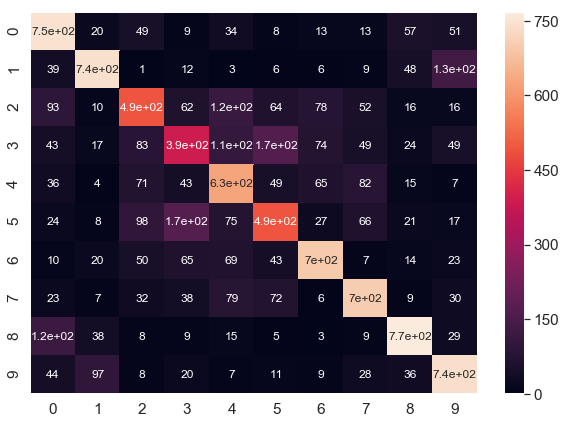

'\n[0] airplane\n[1] car\n[2] bird\n[3] cat\n[4] deer\n[5] dog\n[6] frog\n[7] horse\n[8] ship\n[9] truck\n'

In [15]:
Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

"""
[0] airplane
[1] car
[2] bird
[3] cat
[4] deer
[5] dog
[6] frog
[7] horse
[8] ship
[9] truck
"""

313/313 - 6s - 6s/epoch - 18ms/step
0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[755  16  49  22  25  10   6  18  54  45]
 [ 20 810   4  13   4   9   4   2  28 106]
 [ 92  15 537  75  85  76  40  44  18  18]
 [ 25  11  72 482  87 176  47  44  21  35]
 [ 36   8  88  76 603  38  23 107  14   7]
 [ 12   5  60 185  48 581  22  57  13  17]
 [ 14  23  54  89  84  35 640  21  11  29]
 [ 16   6  26  47  69  67   5 737   8  19]
 [ 69  42  10  14   8   8   3  17 784  45]
 [ 38  91  10  15  15  10   5  18  26 772]]


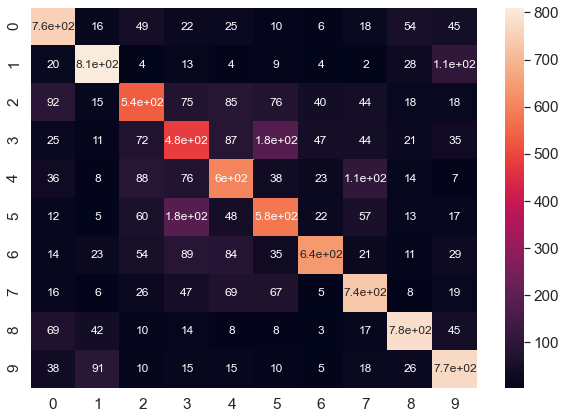

In [27]:
Y_pred_2 = model2.predict(x_test, verbose=2)
y_pred_2 = np.argmax(Y_pred_2, axis=1)
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred_2)[ix].sum())
cm_2 = confusion_matrix(np.argmax(y_test,axis=1),y_pred_2)
print(cm_2)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
df_cm_2 = pd.DataFrame(cm_2, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm_2, annot=True,annot_kws={"size": 12})# font size
plt.show()

313/313 - 5s - 5s/epoch - 16ms/step
0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[773  13  42  10  29   6   3  17  64  43]
 [ 35 782   6  11   6   5   6   3  45 101]
 [ 89   9 613  52  99  59  28  30  13   8]
 [ 33  20  95 450 111 158  33  49  26  25]
 [ 31   6  73  49 667  23  24 110  16   1]
 [ 20   5  88 157  67 556  18  60  17  12]
 [ 21  13  65  78  79  29 669  16  14  16]
 [ 16   1  54  30  78  43   6 758   4  10]
 [ 82  26  22  10  11  10   0   5 809  25]
 [ 49  67  13  16  14   7   4  23  47 760]]


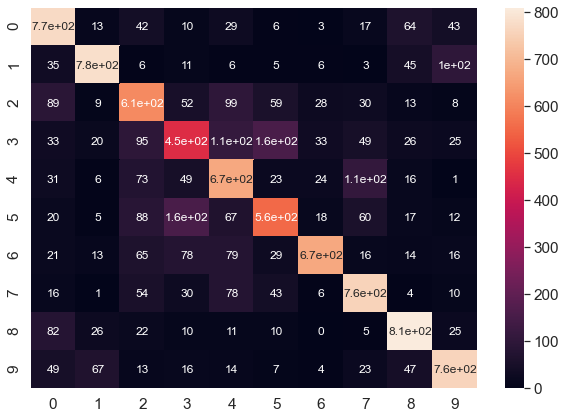

In [28]:
Y_pred_my_model = my_model.predict(x_test, verbose=2)
y_pred_my_model = np.argmax(Y_pred_my_model, axis=1)
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred_my_model)[ix].sum())
cm_my_model = confusion_matrix(np.argmax(y_test,axis=1),y_pred_my_model)
print(cm_my_model)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
df_cm_my_model = pd.DataFrame(cm_my_model, range(10), range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm_my_model, annot=True,annot_kws={"size": 12})# font size
plt.show()

In [ ]:
#EXERCISE
#Increase epoch from 10 to 100 by 30 and record the accuracy results, keep batch size 32
#Increase batch from 32 to 256 by 32 and record the accuracy results, keep epoch 10



# Create a CNN model in baseline_model2 function which includes:
# 1) first CNN layer with 32 kernels and kernel size is 5, padding same and activation function is relu
# 2) use maxpooling layer with 2x2 and strides is 2
# 3) second CNN layer with 64 kernels and kernel size is 5, padding same and activation function is relu
# 4) use maxpooling layer with 2x2 and strides is 2
# 5) Flatten
# 6) The first hidden layer with 128 neurons and activation function is relu
# 7) The second hidden layer with 128 neurons and activation function is relu
# 8) Output layer with 10 neurons and activation function is softmax
# Use categorical_crossentropy and adam optimizer

#Run the baseline_model2 with epochs=10 and batch_size=32

#Create your own CNN model with
 # the Convolutional Layers that you will decide how many you want to use
 # Fully connected layers that you will decide how many you want to use
 # and keep epochs=10 and batch_size=32
#Compare accuracy results obtained using baseline_model, baseline_model2 and your model    

# Write a report about it. Discuss and analyze the results